# [ES-21AC] State and County Prisons 



---
### Professor: Victoria Robinson 
### GSI: Phillip Pierini

The goal os this project is for students to undertand that the can do social work using data. This notebook explores the incarceration tends and impacts of prison realignment in California. 

*Estimated Time: X minutes*

---

### Topics Covered
- State Prison
- County Jail 

### Table of Contents

[The Data](#sectiondata)<br>

[Context](#sectioncontext)<br>

1 - [State Prisons](#section1)<br>

[Gender Divison](#subsection1)<br>
   
2 - [County Jail](#section2)<br>

[Section 3](#subsection3)<br>

**Dependencies:**

In [1]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


import ipywidgets as widgets

---

## 1. The Data <a id='sectiondata'></a>

In this notebook, you will use data from two sources. The CDCR (California Department of Corrections and Rehabilitation)
and the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 

The CDCR reports the number of people in state prisons across California. On this data set, you wil find information including the capacity (staff & desgin) of each prison, and the current popualtion. This will provide with a fremework to understand prison overcrowding and the effectivenss of policy to reduce it. 

The Jail Profile Survey releases reports on data recorded by local agecies. Some of the valuable information that will find here include the total number of unsetenced and sentences males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution state bond monies, and future projections for other jail needs. 

If you are interested in learning more please visit:
[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)

---

## Context  <a id='sectioncontext'></a>

Durign the course, we have learned about the polciies of realignment, incarceration, and crime trends in California. By exploring these datasets we hope to get a clear picture of the maginitude of prison overcrowding per facility and region, and the effects of realignmnet polcies in the state ad county prisons. 

---

Below you will find a data dictionary for future reference. 


|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | ... |
|civil_addict | ... |
|total_population | ... |
|designed_capacity | ... |
|percent_occupied | ...|
|staffed_capacity | ...|


### 1.1 Importing the Data

In [2]:
### Here we import the data from a file named `monthly_cdcr_population.csv`
### The table has the columns that are listed above.
data = Table().read_table("monthly_cdcr_population.csv")

### Removed a column from the table, because we do not need the information in our exercise.
data = data.drop("source_pdf_name")

### The table is sort by year with the following line of code. 
data.sort(0)

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


---
# 2. State Prisons as a Whole (general info)<a id='section1'></a>
---

Background on state prisons versus federal prisons and emphasizing the difference with jails


- California state prisons are a large part of the ...

### 2.1 How has the population size of prisons changed over time in regards to the designed capacity of a prisons?
or?
### 2.1 Designed Capacity of California's Prisons over time

########## The Prison Industrial Complex has created our current issue with mass incarceration. Thus far, we have learned how prisons were designed to 


Let's look at how the size of prison populations has changed over time in regards to the number of inmates the prison is designed to hold.

In [3]:
### We want to look at 3 columns from our original `data` table. We use the key word 
### select to tell it that we want this specific selection of columns in a new table.
### It keeps all the rows from the original table.
year_and_design_capacity = data.select("year", "institution_name",'designed_capacity')
year_and_design_capacity

year,institution_name,designed_capacity
1996,VSP (VALLEY SP),1980
1996,SCC (SIERRA CONSERVATION CENTER),320
1996,NCWF (NO CAL WOMEN'S FACIL),400
1996,CCWF (CENTRAL CA WOMEN'S FAC),2004
1996,"CRC (CAL REHAB CTR, WOMEN)",500
1996,CIW (CA INSTITUTION FOR WOMEN),1026
1996,WSP (WASCO SP),2484
1996,SCC (SIERRA CONSERVATION CENTER),3606
1996,SRTA (SANTA RITA CO. JAIL-RC),395
1996,RJD (RJ DONOVAN CORRECTIONAL FAC),2200


In [4]:
### This combines all the row values that have the same year, and 
### it sums the designed capacity of each prison. 
total_capacity_ca = year_and_design_capacity.group("year", sum)
total_capacity_ca

### NOTICE: the second column of the table, `institution_name_sum` 
### has no row values. This occurs, because we can not find the 
### sum of two names.

year,institution_name sum,designed_capacity sum
1996,,873676
1997,,910797
1998,,956740
1999,,958881
2000,,965721
2001,,964584
2002,,962784
2003,,962944
2004,,969874
2005,,990532


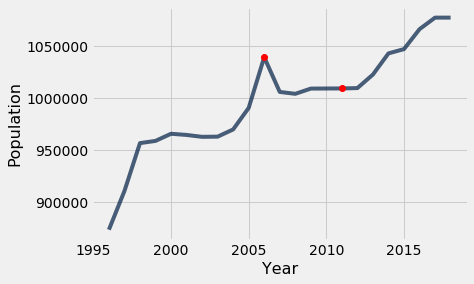

In [5]:
### We can display the change in design capacity of California's state prisons over 
### time by using the .plot function. The plot function is 
total_capacity_ca.plot("year", "designed_capacity sum")

### These two lines label the x-axis of our graph and the y-axis.
plt.xlabel("Year")
plt.ylabel("Population")

### These lines of code plot the red dots on the line plot below.
plt.plot([2011], total_capacity_ca.where("year", 2011).column("designed_capacity sum").item(0), 'ro')
plt.plot([2006], total_capacity_ca.where("year", 2006).column("designed_capacity sum").item(0), 'ro')

# Question 1?

Looking at the graph produced in the section above how does it reflect the systematic changes of the PIC? Name a court case that is represented by a red dot on the plot above.

### 2.2 Total Population in California's Prisons over time

Now that we have seen how the prison population has changed over time, we want to compare the change in the population over time with the change in the structure of prisons over time. We will look at the intended prison population capacity for California's state prisons.

In [6]:
### Here is our original dataset for reference.
data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


In [7]:
### Here we can view the population change of prisons over time, the year they correspond to, and the 
### designed capcaity each prison holds. We can combine all the prisons from a certain year, and look 
### at how the population changed over time.
prison_pop_design = data.select("year", "total_population", "designed_capacity").group("year", sum)
prison_pop_design

year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721
2001,1798592,964584
2002,1792472,962784
2003,1818515,962944
2004,1868323,969874
2005,1882921,990532


In [8]:
## PLEASE EDIT THIS:
### Calculated the percentage of people within a prison out of the intended size of the prison 
## the total population for a certain year 
### people in all of California's prisons and how that compares to the capacity it was designed for.
capacity_percentage = prison_pop_design.column("total_population sum") / prison_pop_design.column("designed_capacity sum") * 100
capacity_percentage

array([ 185.85905988,  190.97812136,  186.89947112,  189.59797931,
        188.51397039,  186.46297264,  186.17592316,  188.84950734,
        192.63564133,  190.09189001,  188.49532912,  195.52605312,
        190.30095205,  183.36618572,  178.73669545,  173.23535445,
        149.88321645,  144.95077023,  138.83530151,  132.72696534,
        131.7232109 ,  132.02795138,  131.94811151])

In [9]:
### Add the percentages we calculated above to the previous table.
prison_pop_design = prison_pop_design.with_column("Design Percent", capacity_percentage)
prison_pop_design

year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899
1999,1818019,958881,189.598
2000,1820519,965721,188.514
2001,1798592,964584,186.463
2002,1792472,962784,186.176
2003,1818515,962944,188.85
2004,1868323,969874,192.636
2005,1882921,990532,190.092


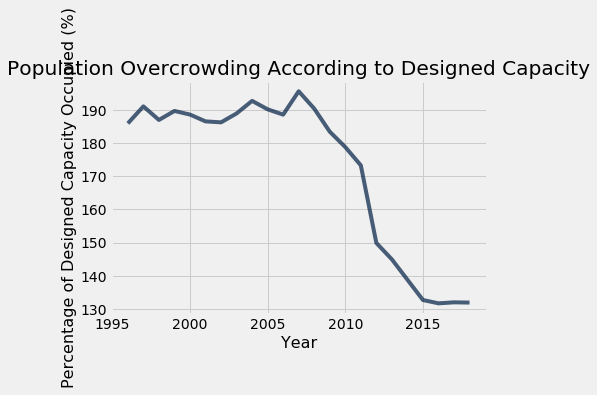

In [10]:
#### Now we can plot how overcrowding changed over time, by observing the change in the percentage 
### of people within prisons in comparison to how many people prisons are designed to hold.
prison_pop_design.plot("year", "Design Percent")
plt.title("Population Overcrowding According to Designed Capacity")
plt.xlabel("Year")
plt.ylabel("Percentage of Designed Capacity Occupied (%)")

## Question 2? 
What is the trend of the line?

### 2.3 Staffed Capcacity

We have seen how prisons exceed the number of prisoners they are designed to have. They exceed the number of people per designated space. However, a key aspects to these institutions are the hundreds of people employed to maintain this system. The number of people needed to maintain this system differs from both the number of people within these institutions and the number of people these institutions are designed to hold. We will observe the differences in the following section.

In [11]:
### Similar to the section before, we have selected the information we want to use, and have grouped together 
### all the individual prisons for a certain year. 
prison_staff = data.select("year", "total_population", "staffed_capacity").group("year", sum)
prison_staff

year,total_population sum,staffed_capacity sum
1996,1623806,1603264
1997,1739423,1713086
1998,1788142,1788475
1999,1818019,1822181
2000,1820519,1828072
2001,1798592,1807990
2002,1792472,1798228
2003,1818515,1833103
2004,1868323,1881649
2005,1882921,1909860


In [12]:
### population / staff
staff_percentage = prison_staff.column("total_population sum") / prison_staff.column("staffed_capacity sum") *100
staff_percentage

array([ 101.28126123,  101.53740092,   99.98138079,   99.77159239,
         99.58683247,   99.48019624,   99.67990711,   99.20419093,
         99.2917914 ,   98.58947776,  100.15123527,   98.60342226,
         98.65553117,   97.77068179,   98.05314295,   99.07368789,
         98.33165891,  100.11090436,   95.30052336,   90.83579994,
         91.49697673,   96.43139026,   96.93737037])

In [13]:
### Added the percentages to the table.
prison_staff = prison_staff.with_column("Staff", staff_percentage)
prison_staff

year,total_population sum,staffed_capacity sum,Staff
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814
1999,1818019,1822181,99.7716
2000,1820519,1828072,99.5868
2001,1798592,1807990,99.4802
2002,1792472,1798228,99.6799
2003,1818515,1833103,99.2042
2004,1868323,1881649,99.2918
2005,1882921,1909860,98.5895


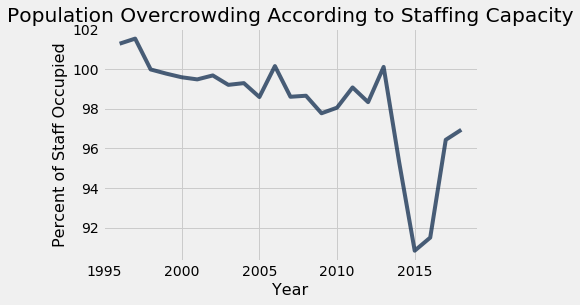

In [14]:
### We plotted the percentage of Staff filled where staff is needed
prison_staff.plot(0, "Staff")
plt.title("Population Overcrowding According to Staffing Capacity")
plt.xlabel("Year")
plt.ylabel("Percent of Staff Occupied")

In [15]:
# REALIZED MISTAKE IN CALCULATION; WHAT DOES STAFF/DESIGN SHOW??
# staff = prison_staff.column("staffed_capacity sum") / prison_staff.column("designed_capacity sum") *100
# prison_staff = prison_staff.with_column("Staff", staff)
# prison_staff.plot(0, "Staff")

### 2.4 Designed Capacity versus Staff Capacity

Now that we have graphed the change we want to compare them side by side

In [16]:
### We want all the years in our dataset, so that we can combine it with the design 
### and staff capacity of prisons over time 
compare_tbl = data.group("year").drop("count")
compare_tbl

year
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005


In [17]:
compare_tbl = compare_tbl.with_column("Design Percentage", capacity_percentage)
compare_tbl = compare_tbl.with_column("Staff Percentage", staff_percentage)
compare_tbl

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814
1999,189.598,99.7716
2000,188.514,99.5868
2001,186.463,99.4802
2002,186.176,99.6799
2003,188.85,99.2042
2004,192.636,99.2918
2005,190.092,98.5895


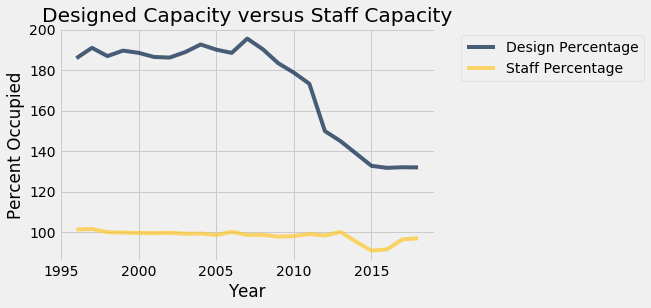

In [18]:
compare_tbl.plot("year")
plt.title("Designed Capacity versus Staff Capacity")
plt.xlabel("Year")
plt.ylabel("Percent Occupied")

### 2.5 Interactive Widget

Do not worry about the code in the next section. You will not have to implement anything like this. The code produces a widget which allows you to interact with the dataset. In this example, you will be able to scroll through all of the prisons in Calfornia, and you can see how the designed capacity versus population has changed over time.

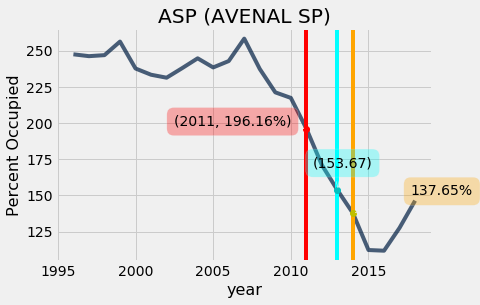

In [19]:
# populations based off the year rather than month
grouped = data.group(["institution_name", "year"], sum)

new_percents = grouped.column("total_population sum") / grouped.column("designed_capacity sum") *100
grouped = grouped.with_column("Percent Occupied", new_percents)

institutions = grouped.group(0).column(0)
institutions

inp = widgets.IntSlider(
    value=0,
    min=0,
    max=39,
    step=1,
    description='Institution:',
    orientation='horizontal',
    readout= True,
    readout_format='d'
)

def f(inp):
    inst = grouped.where(0, institutions[inp])
    inst.plot(1, "Percent Occupied")
    year1 = inst.column("year") 
    if np.any(year1 == 2011):
        plt.axvline(x=2011, color = "red")
        point1 = inst.where("year", 2011).column("Percent Occupied").item(0)
        plt.plot([2011], [point1], 'ro')
        
        plt.annotate("(2011, {0}%)".format(round(point1, 2)),
        xy=(2011, round(point1, 2)), xytext=(-15, 0),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    if np.any(year1 == 2013):
        plt.axvline(x=2013, color = "cyan")
        point2 = inst.where("year", 2013).column("Percent Occupied").item(0) 
        plt.plot([2013], [point2], 'co')
        
        plt.annotate("({0})".format(round(point2, 2)),
        xy=(2013, round(point2, 2)), xytext=(35, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    if np.any(year1 == 2014):
        plt.axvline(x=2014, color = "orange")
        point3 = inst.where("year", 2014).column("Percent Occupied").item(0)
        plt.plot([2014], [point3], 'yo')
        
        plt.annotate("{0}%".format(round(point3, 2)),
        xy=(2014, round(point3, 2)), xytext=(120, 15),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        
    plt.title(institutions[inp])
    
out = widgets.interactive_output(f, {'inp': inp})
widgets.HBox([widgets.VBox([inp]), out])
#out.clear_output()

^^ labeling options for widget:
just the y-value
coordinate with year and percent
label y-axis as percent with "%"

In [20]:
# # attempt 2 not repeating plots
# from ipywidgets import interact, interactive
# from IPython.display import clear_output, display, HTML
# w = interactive(f, inp =(0,39))
# display(w)

---
## 3. GENDER DIVISION <a id='subsection1'></a>
---
**Context:** The system is reinforcing the idea that prison population are mostly male and of a certain charcater. Since we have a limited data sets we cannot investigate the racial aspect such claims. However, this dataset allows us to get a more meaningful understanding of gender divisions on prisons, in order to get a better understanding of the populations that the prison industrial complex was made to hold. 


In [21]:
# Need to come back to male-female instituions divide 
# institutions = grouped.group(0).column(0)
# (institutions)

In [22]:
### Here we can see all the institutions in the dataset.
data.group("institution_name").show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276


### 3.1 UNIQUE FEMALE PRISONS

The data is made up of both male and female prisons. We have to sort these prisons into separate groups before we can analyze male and female institutions separately. In this section, we will find all the data corresponding to female institutions.

The institutions named in our table are not always easy to decipher as male or female institutions. We had to double check whether an institution was male or female. Upon checking we realized the following institutions were actually female, so we need to add them to our table.

In [105]:
### Female institution names
actually_female = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)")
actually_female

array(["CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)"], 
      dtype='<U30')

In [109]:
### We get the data corresponding to the institutions we missed the first time.
female_data = data.where("institution_name", are.contained_in(actually_female))
female_data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,2,NCWF (NO CAL WOMEN'S FACIL),787,1,788,400,197,760
1996,2,CCWF (CENTRAL CA WOMEN'S FAC),3171,20,3191,2004,159.2,2999
1996,2,"CRC (CAL REHAB CTR, WOMEN)",100,702,802,500,160.4,842
1996,2,CIW (CA INSTITUTION FOR WOMEN),1726,34,1760,1026,171.5,1646
1996,3,NCWF (NO CAL WOMEN'S FACIL),770,1,771,400,192.8,760
1996,3,CCWF (CENTRAL CA WOMEN'S FAC),3036,7,3043,2004,151.8,2999


In [110]:
### This groups together each occurrence of an institution together.
female_prisons = female_data.group("institution_name")
female_prisons

institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
FOL (FOLSOM SP) (FEMALE),72
FRCC (FRCCC BAKERSFIELD),17
NCWF (NO CAL WOMEN'S FACIL),85


Now that we have identified the data corresponding to female institutions we can calculate the trend of overcrowding within female institutions.

### 3.1.1 Design Capacity for Only Female Institutions

In [131]:
# FEMALE DESIGN VS STAFF
fem_year = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity").group("year", sum)
fem_year

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,76803,47160,74594
1997,82704,47160,78624
1998,84303,47160,82731
1999,83571,47160,84855
2000,82264,47160,81571
2001,78053,47160,77296
2002,72890,47160,69815
2003,70138,42760,66327
2004,74670,42360,72114
2005,78890,43690,74720


In [132]:
#calculated the number of people in the prison and how that compared to the capacity it was designed for.
fem_new_capacity = fem_year.column("total_population sum") / fem_year.column("designed_capacity sum") *100
fem_new_capacity

array([ 162.8562341 ,  175.36895674,  178.75954198,  177.20737913,
        174.43596268,  165.50678541,  154.55894826,  164.02712816,
        176.27478754,  180.56763561,  178.76674165,  192.40818224,
        200.05473181,  191.50121655,  179.61068795,  168.25185185,
        136.64434524,  156.7833259 ,  158.91371003,  140.55847569,
        136.50240911,  137.92159439,  135.71616294])

In [133]:
fem_year = fem_year.with_column("Design Percent Occupied", fem_new_capacity)
fem_year

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,76803,47160,74594,162.856
1997,82704,47160,78624,175.369
1998,84303,47160,82731,178.76
1999,83571,47160,84855,177.207
2000,82264,47160,81571,174.436
2001,78053,47160,77296,165.507
2002,72890,47160,69815,154.559
2003,70138,42760,66327,164.027
2004,74670,42360,72114,176.275
2005,78890,43690,74720,180.568


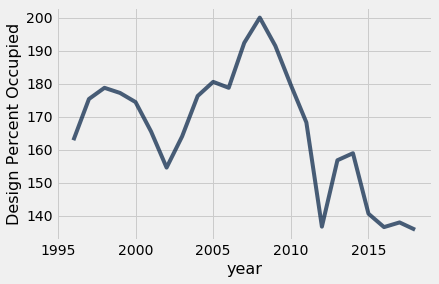

In [142]:
fem_year.plot("year", "Design Percent Occupied")

### 3.1.2 Staff Capacity for Only Female Institutions

Using the table I made above named...

In [144]:
fem_year

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,76803,47160,74594,162.856
1997,82704,47160,78624,175.369
1998,84303,47160,82731,178.76
1999,83571,47160,84855,177.207
2000,82264,47160,81571,174.436
2001,78053,47160,77296,165.507
2002,72890,47160,69815,154.559
2003,70138,42760,66327,164.027
2004,74670,42360,72114,176.275
2005,78890,43690,74720,180.568


In [137]:
fem_staff_capacity = fem_year.column("total_population sum") / fem_year.column("staffed_capacity sum") *100
fem_staff_capacity

array([ 102.96136418,  105.18925519,  101.90013417,   98.48683048,
        100.84956664,  100.9793521 ,  104.4044976 ,  105.74577472,
        103.54438805,  105.58083512,  102.97544043,   97.07510438,
        100.24183495,   97.19793519,   95.945335  ,   96.24440333,
         97.4425638 ,  101.42329767,  100.96428124,   88.56918109,
         86.04898387,   95.87570793,   96.5775201 ])

In [140]:
fem_staff_tbl = fem_year.with_column("Staff Percent Occupied", fem_staff_capacity)
fem_staff_tbl

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,76803,47160,74594,162.856,102.961
1997,82704,47160,78624,175.369,105.189
1998,84303,47160,82731,178.76,101.9
1999,83571,47160,84855,177.207,98.4868
2000,82264,47160,81571,174.436,100.85
2001,78053,47160,77296,165.507,100.979
2002,72890,47160,69815,154.559,104.404
2003,70138,42760,66327,164.027,105.746
2004,74670,42360,72114,176.275,103.544
2005,78890,43690,74720,180.568,105.581


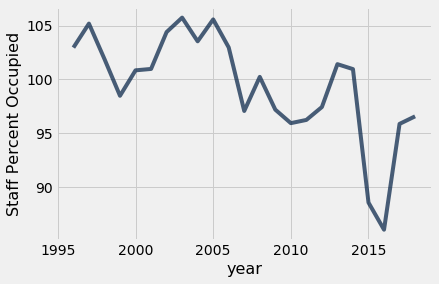

In [141]:
fem_staff_tbl.plot("year", "Staff Percent Occupied")

To view the side by side comparison of staff and design capcity, run the next cell.

In [147]:
### Make a table with your x, and y values.
fem_plot_tbl = fem_staff_tbl.select("year", "Design Percent Occupied", "Staff Percent Occupied")
fem_plot_tbl

year,Design Percent Occupied,Staff Percent Occupied
1996,162.856,102.961
1997,175.369,105.189
1998,178.76,101.9
1999,177.207,98.4868
2000,174.436,100.85
2001,165.507,100.979
2002,154.559,104.404
2003,164.027,105.746
2004,176.275,103.544
2005,180.568,105.581


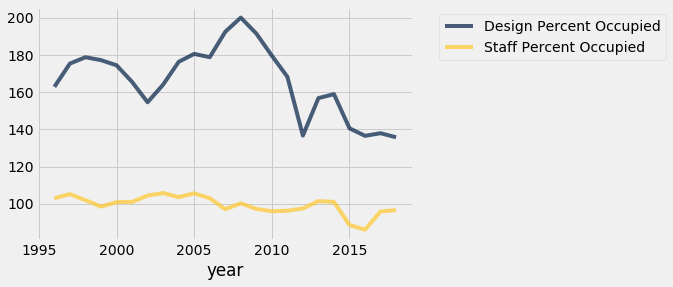

In [148]:
fem_plot_tbl.plot(0)

Moving on to male institutions


### 3.2 UNIQUE MALE PRISONS

In [111]:
### Prisons that do not include "WOMEN" or "FEMALE" in their name and that were 
### not deemed female after further research. 
male_data = data.where("institution_name", are.not_containing("WOMEN"))\
                .where("institution_name", are.not_containing("FEMALE"))\
                .where("institution_name", are.not_contained_in(actually_female))

male_data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566
1996,1,PVSP (PLEASANT VALLEY SP),4080,0,4080,2208,184.8,4008
1996,1,PBSP (PELICAN BAY SP),3509,1,3510,2280,153.9,3730
1996,1,NKSP (NORTH KERN SP),4525,1,4526,2492,181.6,4472
1996,1,MCSP (MULE CREEK SP),3530,0,3530,1700,207.6,3562


In [113]:
male_prisons = male_data.group("institution_name")
male_prisons

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CMC (CA MEN'S COLONY),276
CMF (CA MEDICAL FAC),276
"COR (CA SP, CORCORAN)",276


### MALE

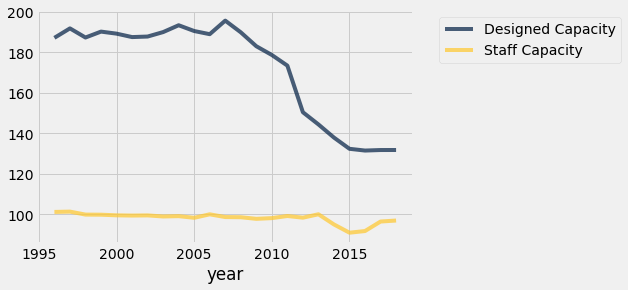

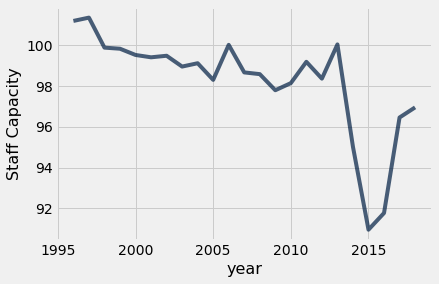

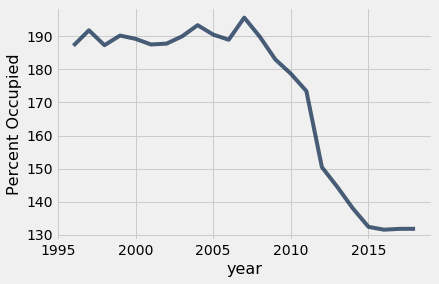

In [34]:
# MALE DESIGN VS STAFF
m_year = male_data.group("year", sum).drop(1, 2)

#calculated the number of people in the prison and how that compared to the capacity it was designed for.
m_new_capacity = m_year.column("total_population sum") / m_year.column("designed_capacity sum") *100
m_year = m_year.with_column("Percent Occupied", m_new_capacity)


m_s = male_data.group(0, sum)
m_staff_capacity = m_s.column("total_population sum") / m_s.column("staffed_capacity sum") *100
m_s = m_year.with_column("Staff Percent Occupied", m_staff_capacity)
m_s = m_s.select("year", "Percent Occupied", "Staff Percent Occupied").relabel("Percent Occupied", "Designed Capacity").relabel("Staff Percent Occupied", "Staff Capacity")

m_s.plot(0)
m_s.plot(0, "Staff Capacity")
m_year.plot(0, "Percent Occupied")

### 3.3 MALE VS FEMALE PRISONS

### FEMALE VS MALE with STAFF VS. DESIGN

In [35]:
male_female = m_s.join("year", fem_s).relabel("Designed Capacity_2", "Female Designed Capacity")
male_female = male_female.relabel("Staff Capacity_2", "Female Staff Capacity")
male_female = male_female.relabel("Designed Capacity", "Male Designed Capacity")
male_female = male_female.relabel("Staff Capacity", "Male Staff Capacity")

male_female

year,Male Designed Capacity,Male Staff Capacity,Female Designed Capacity,Female Staff Capacity
1996,187.172,101.199,162.856,102.961
1997,191.83,101.362,175.369,105.189
1998,187.322,99.8883,178.76,101.9
1999,190.239,99.8343,177.207,98.4868
2000,189.237,99.5279,174.436,100.85
2001,187.54,99.4132,165.507,100.979
2002,187.804,99.4891,154.559,104.404
2003,190.003,98.9586,164.027,105.746
2004,193.383,99.1223,176.275,103.544
2005,190.531,98.3048,180.568,105.581


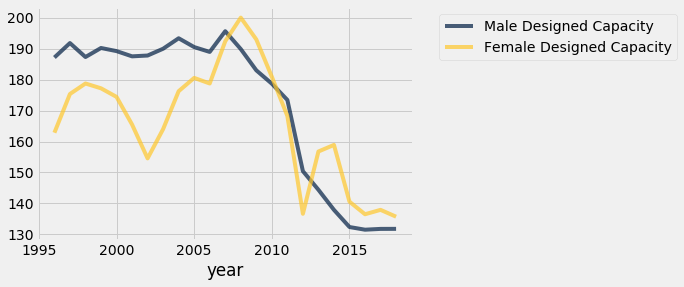

In [36]:
male_female.select(0,1,3).plot(0)

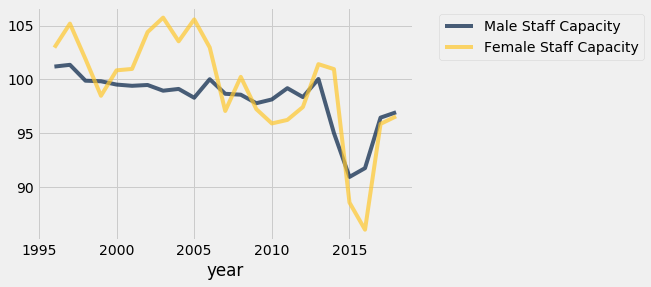

In [37]:
male_female.select(0,2,4).plot(0)

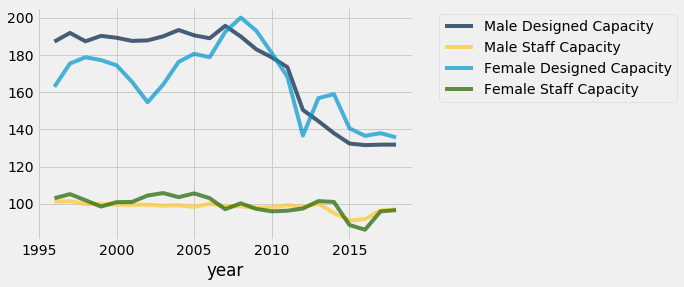

In [38]:
# MALE VS FEMALE FOR STAFF AND DESIGN
male_female.plot(0)

In [40]:
all_joined = compare_tbl.join("year", male_female)
all_joined

year,Design Percentage,Staff Percentage,Male Designed Capacity,Male Staff Capacity,Female Designed Capacity,Female Staff Capacity
1996,185.859,101.281,187.172,101.199,162.856,102.961
1997,190.978,101.537,191.83,101.362,175.369,105.189
1998,186.899,99.9814,187.322,99.8883,178.76,101.9
1999,189.598,99.7716,190.239,99.8343,177.207,98.4868
2000,188.514,99.5868,189.237,99.5279,174.436,100.85
2001,186.463,99.4802,187.54,99.4132,165.507,100.979
2002,186.176,99.6799,187.804,99.4891,154.559,104.404
2003,188.85,99.2042,190.003,98.9586,164.027,105.746
2004,192.636,99.2918,193.383,99.1223,176.275,103.544
2005,190.092,98.5895,190.531,98.3048,180.568,105.581


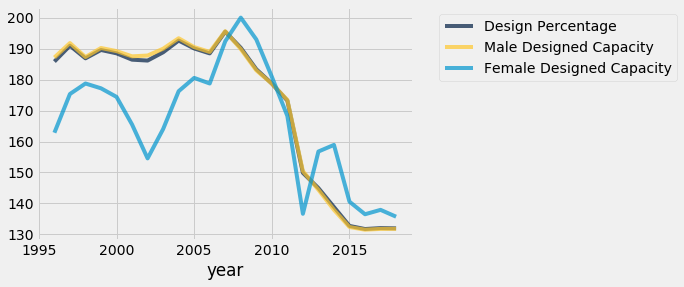

In [41]:
design_all = all_joined.select(0, 1, 3, 5)
design_all.plot(0)

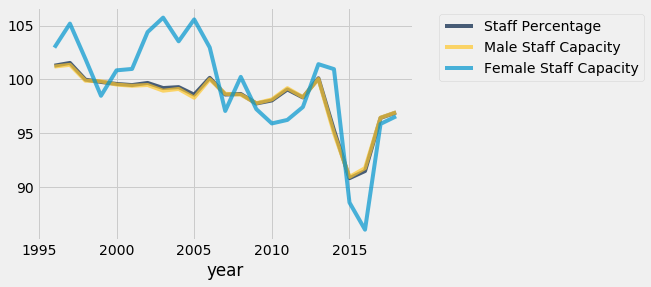

In [42]:
staff_all = all_joined.select(0, 2, 4, 6)
staff_all.plot(0)

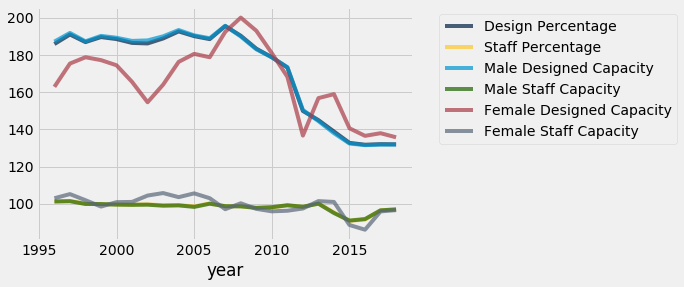

In [43]:
# ALL 6 lines
all_joined.plot(0)

### STACKED BAR CHART (UNDER REVISION)
###### separate civil addict and felon?
##### stacked bar chart

In [44]:
data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


In [45]:
change_by_year = data.group(["institution_name", "year"], sum)
civi_inst = change_by_year.where(0, institutions[0]) 
civi_inst

institution_name,year,month sum,population_felons sum,civil_addict sum,total_population sum,designed_capacity sum,percent_occupied sum,staffed_capacity sum
ASP (AVENAL SP),1996,78,68896,0,68896,27840,2969.8,69516
ASP (AVENAL SP),1997,78,68539,0,68539,27840,2954.4,69516
ASP (AVENAL SP),1998,78,68734,0,68734,27840,2962.6,69516
ASP (AVENAL SP),1999,78,72369,0,72369,28240,3078.2,70316
ASP (AVENAL SP),2000,78,79711,1,79712,33540,2852.6,80820
ASP (AVENAL SP),2001,78,81769,0,81769,35040,2800.4,83136
ASP (AVENAL SP),2002,78,81052,0,81052,35040,2775.9,80136
ASP (AVENAL SP),2003,78,83359,0,83359,35040,2854.8,81786
ASP (AVENAL SP),2004,78,85742,0,85742,35040,2936.4,85086
ASP (AVENAL SP),2005,78,84463,0,84463,35428,2861.7,84336


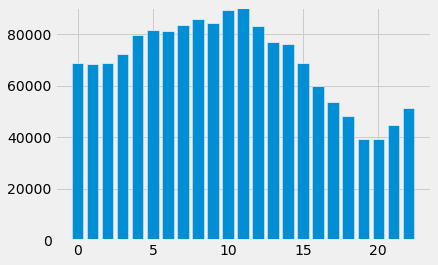

In [46]:
# 1st institution trial; larger proportion of pop felon

N = civi_inst.num_rows
civil_add = civi_inst.column("civil_addict sum")
pop_felon = civi_inst.column("population_felons sum")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, pop_felon, width)
p2 = plt.bar(ind, civil_add, width, bottom=pop_felon)

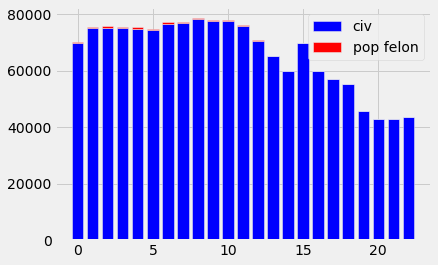

In [47]:
# 2nd institution trial; larger proportion of pop felon
change_by_year2 = data.group(["institution_name", "year"], sum)
civi_inst2 = change_by_year2.where(0, "CIM (CA INSTITUTION FOR MEN)") 

N = civi_inst2.num_rows
civil_add2 = civi_inst2.column("civil_addict sum")
pop_felon2 = civi_inst2.column("population_felons sum")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, pop_felon2, width, color='b')
p2 = plt.bar(ind, civil_add2, width, bottom = pop_felon2, color='r')
plt.legend((p1[0], p2[0]), ('civ', 'pop felon'))

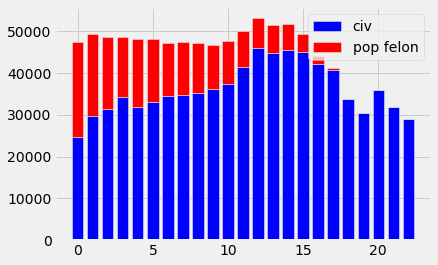

In [48]:
# 3rd institution trial; larger proportion of pop felon

change_by_year3 = data.group(["institution_name", "year"], sum)
civi_inst3 = change_by_year3.where(0, "CRC (CAL REHAB CTR, MEN)") 

N = civi_inst3.num_rows
civil_add3 = civi_inst3.column("civil_addict sum")
pop_felon3 = civi_inst3.column("population_felons sum")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, pop_felon3, width, color='b')
p2 = plt.bar(ind, civil_add3, width, bottom = pop_felon3, color='r')
plt.legend((p1[0], p2[0]), ('civ', 'pop felon'))

In [49]:
month_civi = data.where("institution_name", "CRC (CAL REHAB CTR, MEN)").where("year", 1996) 
month_civi

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,"CRC (CAL REHAB CTR, MEN)",1776,2201,3977,1814,219.2,3906
1996,2,"CRC (CAL REHAB CTR, MEN)",1684,2164,3848,1814,212.1,3906
1996,3,"CRC (CAL REHAB CTR, MEN)",1809,2193,4002,1814,220.6,3906
1996,4,"CRC (CAL REHAB CTR, MEN)",1834,2118,3952,1814,217.9,3906
1996,5,"CRC (CAL REHAB CTR, MEN)",1740,2032,3772,1814,207.9,3906
1996,6,"CRC (CAL REHAB CTR, MEN)",2062,1899,3961,1814,218.4,3906
1996,7,"CRC (CAL REHAB CTR, MEN)",2171,1797,3968,1814,218.7,3906
1996,8,"CRC (CAL REHAB CTR, MEN)",2263,1743,4006,1814,220.8,3906
1996,9,"CRC (CAL REHAB CTR, MEN)",2310,1751,4061,1814,223.9,3906
1996,10,"CRC (CAL REHAB CTR, MEN)",2309,1707,4016,1814,221.4,3906


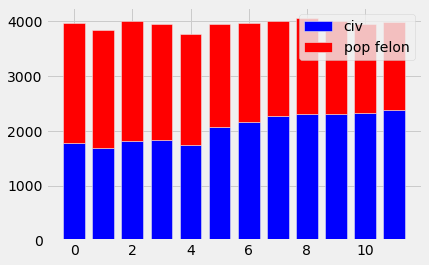

In [50]:
# monthly trial with 3rd institution used above 
# 1996 pop by month for CRC (CAL REHAB CTR, MEN)
N = month_civi.num_rows
m_civil = month_civi.column("civil_addict")
m_pop_felon = month_civi.column("population_felons")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, m_pop_felon, width, color='b')
p2 = plt.bar(ind, m_civil, width, bottom = m_pop_felon, color='r')
plt.legend((p1[0], p2[0]), ('civ', 'pop felon'))

## ISSUE WITH STACKED BAR CHART HARD TO SEE THE DIFFERENCE BETWEEN GROUPS

In [51]:
proportion_civi = change_by_year.column("civil_addict sum") / change_by_year.column("total_population sum")
change_by_civi = change_by_year.with_column("Proportion of civil addicts", proportion_civi)
change_by_civi

# both_c_f = change_by_civi.where("Proportion of civil addicts", are.above(0.0001))
# both_c_f.group("institution_name").show()

institution_name,year,month sum,population_felons sum,civil_addict sum,total_population sum,designed_capacity sum,percent_occupied sum,staffed_capacity sum,Proportion of civil addicts
ASP (AVENAL SP),1996,78,68896,0,68896,27840,2969.8,69516,0
ASP (AVENAL SP),1997,78,68539,0,68539,27840,2954.4,69516,0
ASP (AVENAL SP),1998,78,68734,0,68734,27840,2962.6,69516,0
ASP (AVENAL SP),1999,78,72369,0,72369,28240,3078.2,70316,0
ASP (AVENAL SP),2000,78,79711,1,79712,33540,2852.6,80820,1.25452e-05
ASP (AVENAL SP),2001,78,81769,0,81769,35040,2800.4,83136,0
ASP (AVENAL SP),2002,78,81052,0,81052,35040,2775.9,80136,0
ASP (AVENAL SP),2003,78,83359,0,83359,35040,2854.8,81786,0
ASP (AVENAL SP),2004,78,85742,0,85742,35040,2936.4,85086,0
ASP (AVENAL SP),2005,78,84463,0,84463,35428,2861.7,84336,0


In [52]:
institutions[12]

'CRC (CAL REHAB CTR, MEN)'

# ATTEMPT WIDGET FOR CIVIL ADDICTS OVER TIME

In [53]:
def month_c(index):
    
    month_civi = data.where("institution_name", institutions[index])
    time = month_civi.column("year")
    def plotti(tbl, i):
        month_civi = tbl.where("year", i) 
        N = month_civi.num_rows
        m_civil = month_civi.column("civil_addict")
        m_pop_felon = month_civi.column("population_felons")
        width = 0.75
        ind = np.arange(N)

        p1 = plt.bar(ind, m_pop_felon, width, color='b')
        p2 = plt.bar(ind, m_civil, width, bottom = m_pop_felon, color='r')
        plt.legend((p1[0], p2[0]), ('civil addict', 'population felon'))
        plt.title(institutions[index])
        
    return plotti(month_civi, time[0])
#     if len(time) > 4:
#         plt.close('all')
#         fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#         ax1 = plotti(month_civi, time[0])
#         print(1)
#         ax2 = plotti(month_civi, time[1])
#         print(2)
# #         ax3 = plotti(month_civi, time[2])
# #         ax4 = plotti(month_civi, time[3])
#         #plt.tight_layout()

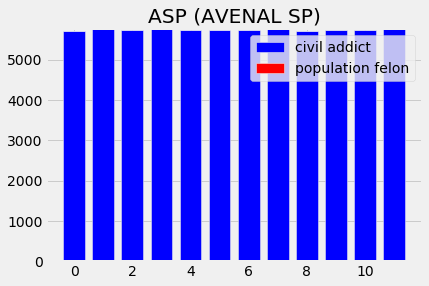

In [54]:
month_c(0)

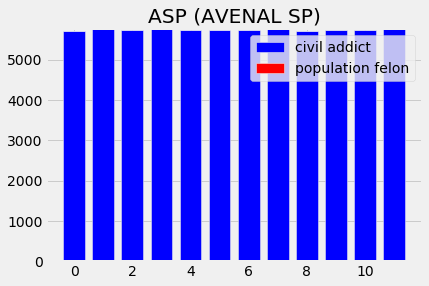

In [55]:
index_inp = widgets.IntSlider(
    value=0,
    min=0,
    max=39,
    step=1,
    description='Institution:',
    orientation='horizontal',
    readout= True,
    readout_format='d'
)

index_inp
out = widgets.interactive_output(month_c, {'index': index_inp})
widgets.HBox([widgets.VBox([index_inp]), out])

In [56]:
## issue with years not all start at the same time